In [3]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

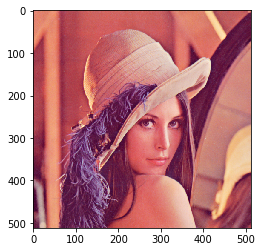

In [23]:
# load the famous Lena image
img = mpimg.imread('lena.png')

# what does it look like?
plt.imshow(img)
plt.show()

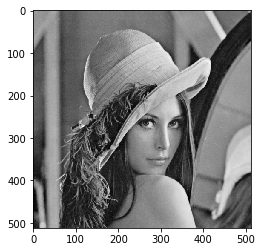

In [24]:
# make it B&W
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')
plt.show()

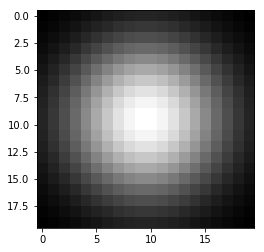

In [26]:
# create a Gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)
W /= W.sum() # normalize the kernel

# let's see what the filter looks like
plt.imshow(W, cmap='gray')
plt.show()

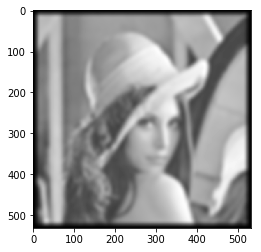

In [27]:
# now the convolution
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

In [28]:
# what's that weird black stuff on the edges? let's check the size of output
print(out.shape)
# after convolution, the output signal is N1 + N2 - 1

(531, 531)


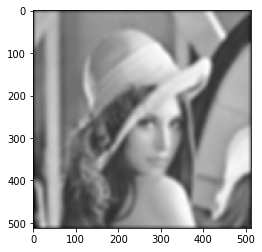

(512, 512)


In [29]:
# we can also just make the output the same size as the input
out = convolve2d(bw, W, mode='same')
plt.imshow(out, cmap='gray')
plt.show()
print(out.shape)

In [30]:
out.shape

(512, 512)

(512, 512, 3)


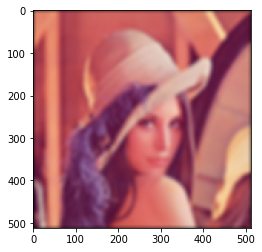

In [31]:
# in color
out3 = np.zeros(img.shape)
print(out3.shape)
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode='same')
# out3 /= out3.max() # can also do this if you didn't normalize the kernel
plt.imshow(out3)
plt.show() # does not look like anything